In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as pt

In [ ]:
main_directory  = '/content/drive/MyDrive/Colab_File_Per/train-perceptron.txt'
df = pd.read_csv(main_directory, sep=" " , header = None,names = ['x1','x2','label'])
print(df)

   x1   x2  label
0   1  1.0      1
1   1 -1.0      1
2   2  2.5      2
3   0  2.0      2
4   2  3.0      2
5   4  5.0      1


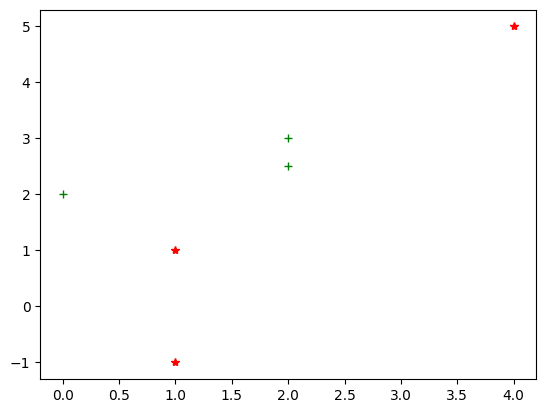

In [ ]:
#Plotting sample points from both classes
for i in range(df.shape[0]):
  if(df['label'][i] == 1):
    plt.plot(df['x1'][i], df['x2'][i], color = 'red', marker = '*' )
  else:
    plt.plot(df['x1'][i], df['x2'][i], color = 'green', marker = '+' )


As we can see these classes can't be seperated with a linear boundary.

In [ ]:
#High dimensional feature
df['x1^2'] = df['x1']**2
df['x2^2'] = df['x2']**2
df['x1*x2'] = df['x1'] * df['x2']
df['1'] = 1
df = df[[  'x1^2', 'x2^2', 'x1*x2', 'x1', 'x2', '1', 'label']]
print(df)

   x1^2   x2^2  x1*x2  x1   x2  1  label
0     1   1.00    1.0   1  1.0  1      1
1     1   1.00   -1.0   1 -1.0  1      1
2     4   6.25    5.0   2  2.5  1      2
3     0   4.00    0.0   0  2.0  1      2
4     4   9.00    6.0   2  3.0  1      2
5    16  25.00   20.0   4  5.0  1      1


In [ ]:
df2 = df
df2 = df2.drop(['label'],axis = 1)
for i in range(df2.shape[0]):
  if(df['label'][i] == 1):
    df2.iloc[i] = -df2.iloc[i]
print(df2)

   x1^2   x2^2  x1*x2  x1   x2  1
0    -1  -1.00   -1.0  -1 -1.0 -1
1    -1  -1.00    1.0  -1  1.0 -1
2     4   6.25    5.0   2  2.5  1
3     0   4.00    0.0   0  2.0  1
4     4   9.00    6.0   2  3.0  1
5   -16 -25.00  -20.0  -4 -5.0 -1


In [ ]:
x = np.array(df2)

In [ ]:
class Perceptron:
    def __init__(self, x, w, lr):
        self.x = x
        self.w = w
        self.lr = lr

    def oneAtaTime(self):
        iter = 0
        while(1):
          flag = 0
          for i in range(self.x.shape[0]):
            dotProd = np.dot(self.w,self.x[i])
            if(dotProd <= 0):
              flag = 1
              self.w = self.w + self.lr * self.x[i]
          if(not flag):
            break
          iter+=1
        return (self.w,iter)

    def manyAtaTime(self):
        iter = 0
        while(1):
          temp = np.zeros((6))
          flag = 0
          for i in range(self.x.shape[0]):
            dotProd = np.dot(self.w,self.x[i])
            if(dotProd <= 0):
              flag = 1
              temp += self.x[i]
          if(flag == 0):
            break
          iter+=1
          self.w = self.w + self.lr * temp
        return (self.w,iter)

In [ ]:
zero = np.zeros(6)
one = np.ones(6)
rand = np.random.rand(6)

In [ ]:
from decimal import Decimal
i = Decimal('0.1')
list1 = []
while(i<=1):
  perc = Perceptron(x,zero,float(i))
  a,b = perc.oneAtaTime()
  perc = Perceptron(x,zero,float(i))
  c,d = perc.manyAtaTime()
  list1.append([float(i),b,d])
  i += Decimal('0.1')
nplist = np.array(list1)
zeroRes = nplist

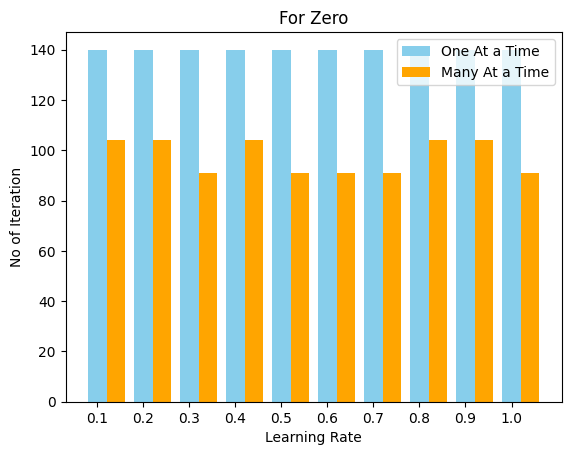

In [ ]:
barWidth = 0.04
plt.bar(nplist[:,0],nplist[:,1],color = 'skyblue',width = barWidth,label = 'One At a Time')
plt.bar(nplist[:,0]+barWidth,nplist[:,2],color = 'orange',width = barWidth,label = 'Many At a Time')
plt.ylabel('No of Iteration')
plt.xlabel('Learning Rate')
plt.title('For Zero')
plt.legend()
plt.xticks(nplist[:,0])
plt.show()

In [ ]:
from decimal import Decimal
i = Decimal('0.1')
list1 = []
while(i<=1):
  perc = Perceptron(x,one,float(i))
  a,b = perc.oneAtaTime()
  perc = Perceptron(x,one,float(i))
  c,d = perc.manyAtaTime()
  list1.append([float(i),b,d])
  i += Decimal('0.1')
nplist = np.array(list1)
oneRes = nplist

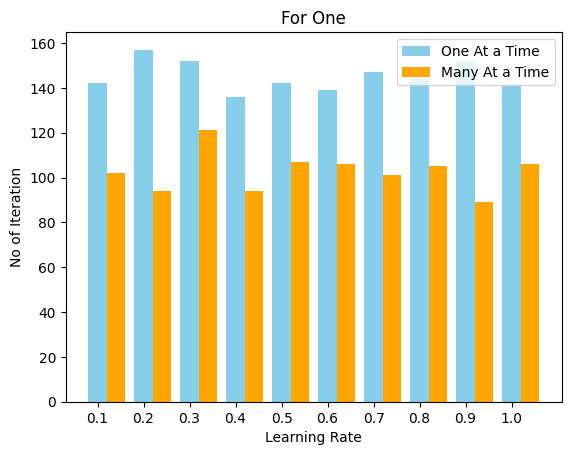

In [ ]:
barWidth = 0.04
plt.bar(nplist[:,0],nplist[:,1],color = 'skyblue',width = barWidth,label = 'One At a Time')
plt.bar(nplist[:,0]+barWidth,nplist[:,2],color = 'orange',width = barWidth,label = 'Many At a Time')
plt.ylabel('No of Iteration')
plt.xlabel('Learning Rate')
plt.title('For One')
plt.legend()
plt.xticks(nplist[:,0])
plt.show()

In [ ]:
from decimal import Decimal
i = Decimal('0.1')
list1 = []
while(i<=1):
  perc = Perceptron(x,rand,float(i))
  a,b = perc.oneAtaTime()
  perc = Perceptron(x,rand,float(i))
  c,d = perc.manyAtaTime()
  list1.append([float(i),b,d])
  i += Decimal('0.1')
nplist = np.array(list1)
randRes = nplist

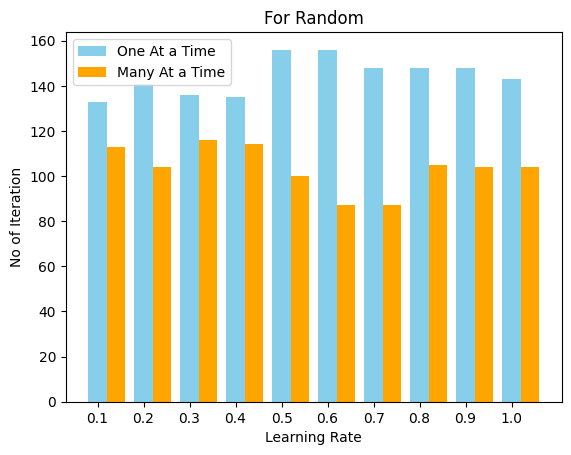

In [ ]:
barWidth = 0.04
plt.bar(nplist[:,0],nplist[:,1],color = 'skyblue',width = barWidth,label = 'One At a Time')
plt.bar(nplist[:,0]+barWidth,nplist[:,2],color = 'orange',width = barWidth,label = 'Many At a Time')
plt.ylabel('No of Iteration')
plt.xlabel('Learning Rate')
plt.title('For Random')
plt.legend()
plt.xticks(nplist[:,0])
plt.show()

In [ ]:
def show_table(res):
  _, ax = plt.subplots()
  ax.axis('off')
  table = ax.table(cellText=res, colLabels=['Alpha(Learning Rate)', 'One at a time', 'Many at a time'], cellLoc = 'center', loc = 'center')
  table.set_fontsize(30)
  table.scale(2,2)
  plt.show()

Questions:\
A. In task 2, why do we need to take the sample points to a high dimension?\
Ans: We take the sample points to higher dimension so that we can linearly seperate the two classes.\
B.In each of the three initial weight cases and for each learning rate, how many updates
does the algorithm take before converging?\
Ans:

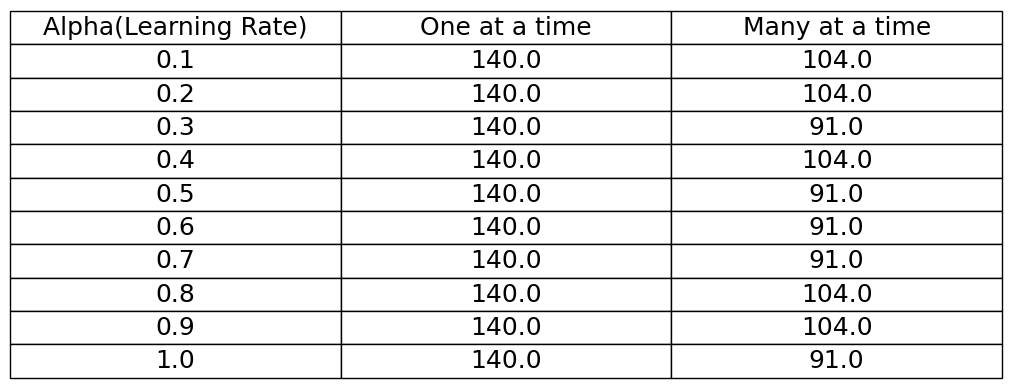

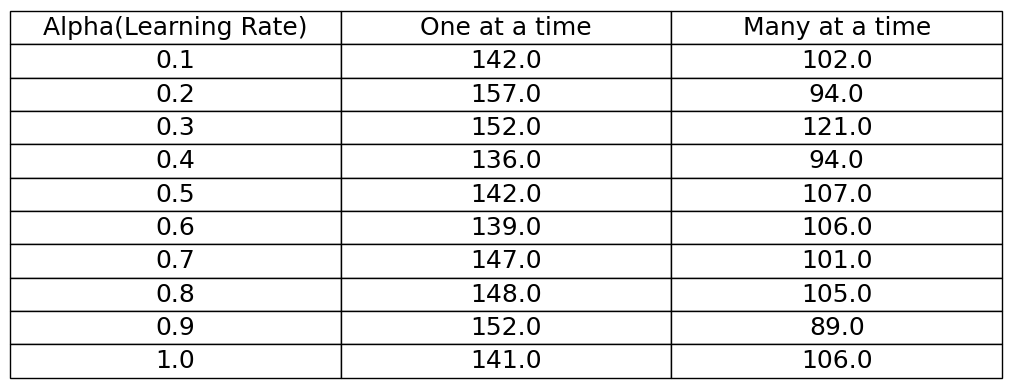

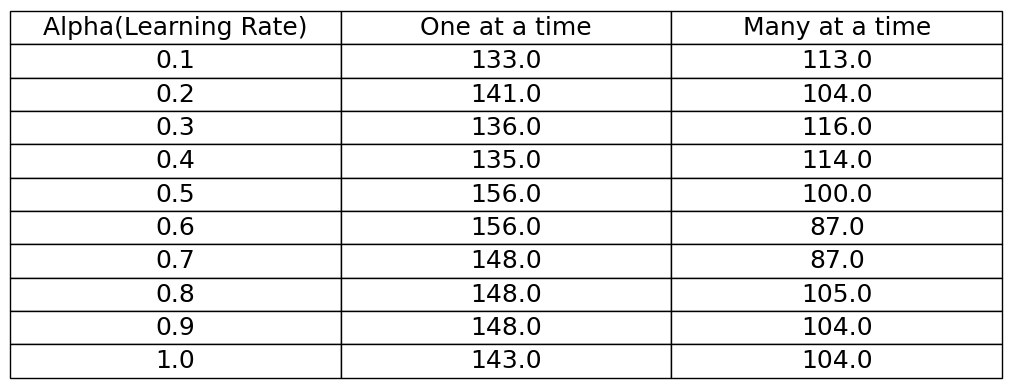

In [ ]:
show_table(zeroRes)
show_table(oneRes)
show_table(randRes)